In [15]:
# pandas, numpy, matplotlib.pyplot, tensorflow 라이브러리를 가져옴
# sklearn 라이브러리에서 train_test_split함수와 StandardScaler, LabelEncoder, KNeighborsClassifier, train_test_split를 가져옴
# StandardScaler: 데이터를 표준화하는 도구(평균 0, 분산 1)
# LabelEncoder: 범주형 데이터를 숫자형으로 변환
# KNeighborsClassifier: K-최근접 이웃(KNN) 알고리즘을 구현한 것
# train_test_split: 데이터를 학습용과 테스터용으로 나누는 데 사용
# seaborn 라이브러리를 가져옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [22]:
# 파일을 읽고 데이터프레임(df)로 저장
df = pd.read_excel('C:/Users/Yujin/Downloads/Raisin_Dataset.xlsx')

In [23]:
# 데이터프레임 출력
df

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2    0.637613   1208.575  Kecimen  
3    0.699599    844.162  Kecimen  
4    0.792772   1073.251  Kecimen  
..        ...        ...      ...  
895  0.668793   1129.072    Besni  
896  0.636476   1214.252    Besni  
897  0.741099   1292.828    Besni  
898  0.658798   1258.548    Besni  
899  0.632020   1272.862    Besni  

[900 rows x 8 columns]

In [26]:
# 컬렴명 확인
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

Text(0.5, 1.0, 'Class')

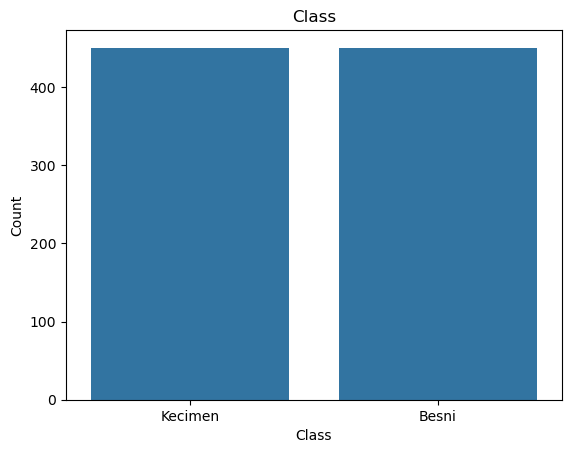

In [28]:
# 결과 갯수 확인 (그래프)
sns.countplot(data = df, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class")

In [30]:
# 결과 갯수 확인 (숫자)
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [32]:
# 결측치 확인
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [34]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [36]:
# 데이터프레임 출력
df

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2    0.637613   1208.575  Kecimen  
3    0.699599    844.162  Kecimen  
4    0.792772   1073.251  Kecimen  
..        ...        ...      ...  
895  0.668793   1129.072    Besni  
896  0.636476   1214.252    Besni  
897  0.741099   1292.828    Besni  
898  0.658798   1258.548    Besni  
899  0.632020   1272.862    Besni  

[900 rows x 8 columns]

In [40]:
# Class 열을 제거, head() 메서드를 사용해 처음 5행을 출력
X=df.drop('Class',axis=1)
X.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
4  0.792772   1073.251

In [42]:
# Class 변수의 클래스 개수를 확인
y=df['Class']
y.value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [44]:
# 전체 데이터의 25%를 테스트 세트로 사용, 75%는 훈련 세트로 사용
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델: 이진 분류 문제
from sklearn.svm import SVC # Support Vector Machine 모델
from sklearn.neural_network import MLPClassifier # 다층 퍼셉트론 분류기
from sklearn.tree import DecisionTreeClassifier # 결정 트리 분류기
from sklearn.metrics import accuracy_score # 정확도 계산, 모델 성능 평가
from sklearn.metrics import confusion_matrix # 혼동 행렬을 계산, 분류 모델의 성능을 자세히 분석

## **1. SVC**

In [48]:
clf_svm = SVC(random_state=0) # SVM 분류기 객체 생성
clf_svm.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 SVM 모델을 학습

pred_svm = clf_svm.predict(X_test) # 학습된 SVM 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print("--- SVM Classifier ---")
print("정확도:", accuracy_score(y_test, pred_svm)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_svm 간의 정확도를 출력
print("혼동 행렬:\n", confusion_matrix(y_test, pred_svm)) # 혼동 행렬을 계산하고 출력

--- SVM Classifier ---
정확도: 0.8133333333333334
혼동 행렬:
 [[ 83  32]
 [ 10 100]]


## **2. LR**

In [50]:
clf_lr = LogisticRegression(random_state=0) # LR 분류기 객체 생성
clf_lr.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 LR 모델을 학습

pred_lr = clf_lr.predict(X_test) # 학습된 LR 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print ("--- Logistic Regression Classifier ---")
print ("정확도:", accuracy_score(y_test, pred_lr)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_lr 간의 정확도를 출력
print ("혼동 행렬:\n", confusion_matrix(y_test, pred_lr)) # 혼동 행렬을 계산하고 출력

--- Logistic Regression Classifier ---
정확도: 0.8844444444444445
혼동 행렬:
 [[ 99  16]
 [ 10 100]]


## **3. RF**

In [52]:
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier를 사용하기 위해 클래스를 임포트
from sklearn.metrics import accuracy_score # 정확도 계산
# 경고 메시지를 무시
import warnings
warnings.filterwarnings('ignore')

clf_rf = RandomForestClassifier(random_state=0) # RF 분류기 객체 생성
clf_rf.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 RF 모델을 학습

pred_rf = clf_rf.predict(X_test) # 학습된 RF 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print ("--- Radom Forest ---")
print("정확도:", accuracy_score(y_test,pred_rf)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_rf 간의 정확도를 출력
print (confusion_matrix(y_test, pred_rf)) # 혼동 행렬을 계산하고 출력

--- Radom Forest ---
정확도: 0.8622222222222222
[[97 18]
 [13 97]]


## **4. DT**

In [54]:
clf_dt = DecisionTreeClassifier(random_state=0) # DT 분류기 객체 생성
clf_dt.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 DT 모델을 학습

pred_dt = clf_dt.predict(X_test) # 학습된 DT 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print ("--- Decision Tree Classifier ---")
print ("정확도:", accuracy_score(y_test, pred_dt)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_dt 간의 정확도를 출력
print ("혼동 행렬:\n", confusion_matrix(y_test, pred_dt)) # 혼동 행렬을 계산하고 출력

--- Decision Tree Classifier ---
정확도: 0.7911111111111111
혼동 행렬:
 [[91 24]
 [23 87]]


## **5. KNN**

In [56]:
# KNN 분류기 초기화
knn = KNeighborsClassifier(n_neighbors=5) # KNN 분류기 객체 생성
knn.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 KNN 모델을 학습

pred_knn = knn.predict(X_test) # 학습된 KNN 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print("--- K-Nearest Neighbors ---")
print("정확도:", accuracy_score(y_test, pred_knn)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_knn 간의 정확도를 출력
print("혼동 행렬:\n", confusion_matrix(y_test, pred_knn)) # 혼동 행렬을 계산하고 출력

--- K-Nearest Neighbors ---
정확도: 0.8533333333333334
혼동 행렬:
 [[ 91  24]
 [  9 101]]
